In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns

import scanpy as sc
import squidpy as sq

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define a custom color map from light grey to dark red
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_cmap", ["lightgrey", "darkred"]
)

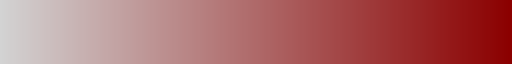

In [4]:
cmap

In [26]:
!pwd

## Creating folders to write outputs
path1 = './output_dataobjects/sample_level_objects'
path2 = './figures'

# Make the directories. exist_ok=True prevents error if dir already exists.
os.makedirs(path1, exist_ok=True)
os.makedirs(path2, exist_ok=True)

/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/notebooks/05_Annotating Samples_perSlide


## CORRECT THE LOCATION : Use the file integrated by Robin

In [6]:
slide1 = sc.read_h5ad('../02_ReadingInData_Integration/outputs/dataobjects/XeniumData_8_slide1.h5ad')

In [7]:
cluster_colors = slide1.uns['leiden_colors']
cluster_colors


array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a', '#8c6d31'], dtype=object)

In [8]:
# Markers to be plotted
Markers_list = [
    "leiden",
    'PTPRC',
    'CD3E',
    'CD3D',
    'CD3G',
    'CD4',
    'CD8A',
    'GZMA',
    'CD14',
    'LYZ',
    'CD163',
    'CLEC9A'
    ]

In [9]:
slide1

AnnData object with n_obs × n_vars = 278382 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

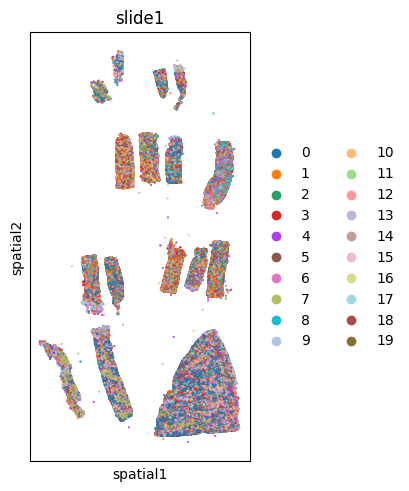

In [10]:
# In this function, using 'save' argumen creates a 'figures' folder and saves images there
sq.pl.spatial_scatter(
    slide1,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
    title='slide1',
    save="slide1_leiden.png"
)

In [11]:
slide1.obsm["spatial"]

array([[ 4221.53306154,   884.85878   ],
       [ 4198.10564   ,   924.251868  ],
       [ 4556.54075714,   577.16478286],
       ...,
       [ 8759.87581452, 18990.74809677],
       [10470.64344643, 11495.34233929],
       [ 4360.42467576, 14413.62345455]])

In [12]:
# TO_DO : Got this from Robin. Understand it better
# extracting the 1 column(x) and 2nd coumn (for y vlaues) and inverting both 
# (because both x and y together determine the spatial location of a cell.
# There is a need for inversion probably beause the coordinate sytsem used by Xenium and
# that in the HnE images using which the sldies are visualized and samples were annotated are different

x, y = slide1.obsm["spatial"][:,0][::-1], list(slide1.obsm["spatial"][:,1])[::-1] 


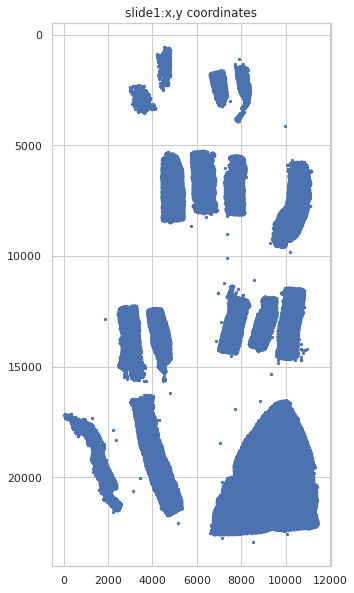

In [13]:
sns.set(style="whitegrid") # this seaborn style was later causing a problem that the dotplot of teh clusters did not get a black line demarcating the different marekr groups.
plt.figure(figsize=(5,10))
ax=plt.subplot(1,1,1)
ax.scatter(x, y, s=5)
ax.invert_yaxis()
plt.title('slide1:x,y coordinates')
plt.savefig("./figures/slide1_xyCoordinates.png")
plt.savefig("./figures/slide1_xyCoordinates.pdf")
plt.show()

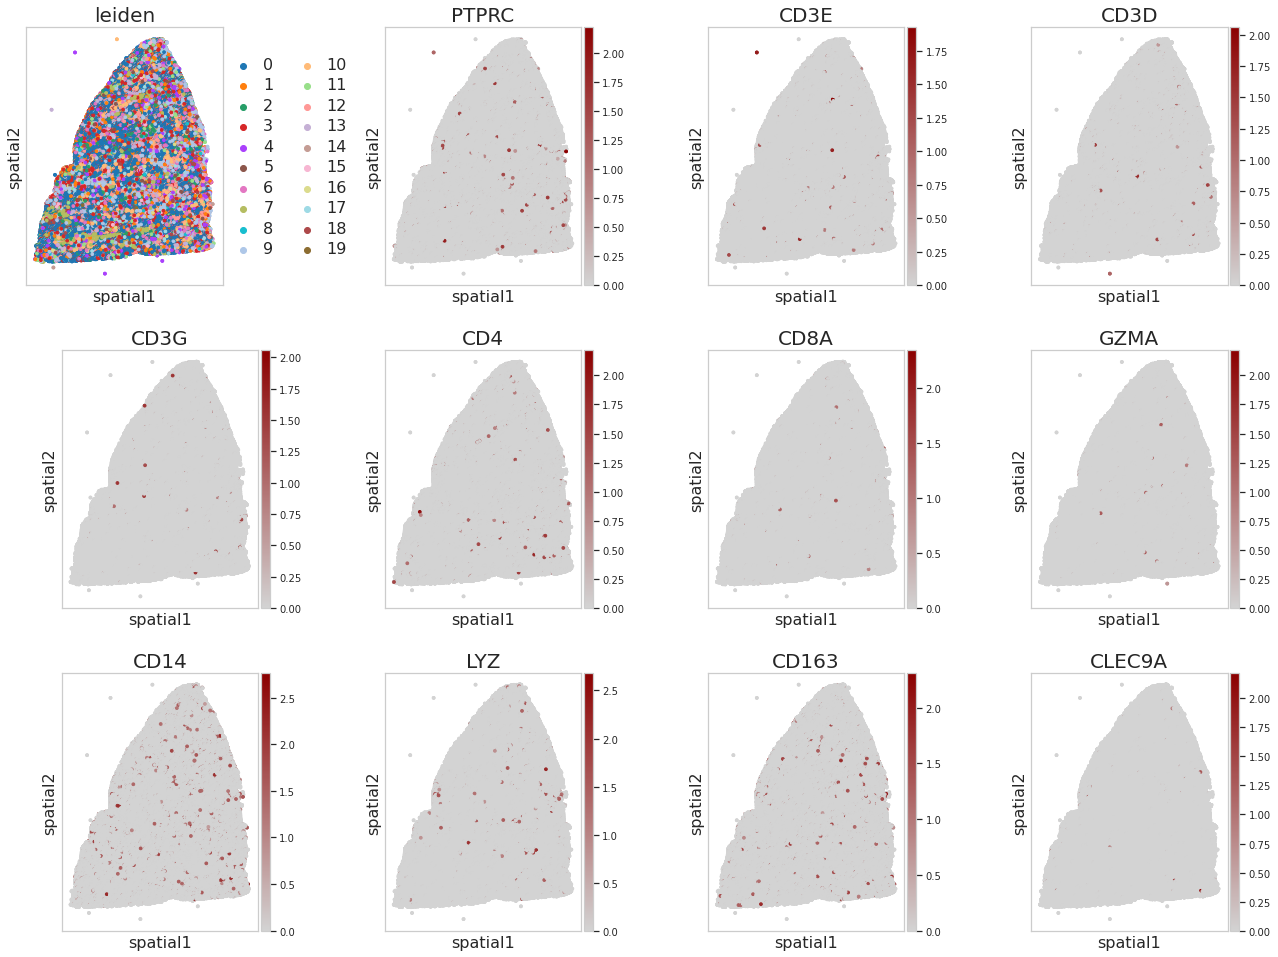

In [14]:
xmin = 6000
xmax = 12000
ymin = 16000
ymax = 30000

sub_mask = ((slide1.obs["x_centroid"] >= xmin) & 
      (slide1.obs["x_centroid"] < xmax) & 
      (slide1.obs["y_centroid"] >= ymin) & 
      (slide1.obs["y_centroid"] < ymax))

# Subset the AnnData object to include only cells within the ROI
X1_Cntrl = slide1[sub_mask].copy()

# Initialize a column to store the sample annotation. 
# Start with a default value, 'Not_In_Sample' 
# This will remain unchnaged for cells that don't get assigned to any samples.
slide1.obs['Patient_Sample_ID'] = 'Not_In_Sample'
slide1.obs.loc[sub_mask, 'Patient_Sample_ID'] = 'X1_Cntrl' 

##Plotting

sq.pl.spatial_scatter(
    X1_Cntrl,
    library_id="spatial",
    cmap=cmap,  # custom color map
    shape=None,
    color= Markers_list,
    size=30,
    wspace=0.1,
    figsize=(5, 5)
)

fig = plt.gcf()  # Get current figure
axs = fig.get_axes()  # Get all axes in the figure
for ax in axs:
    ax.set_title(ax.get_title(), fontsize=20)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(16)

plt.show()



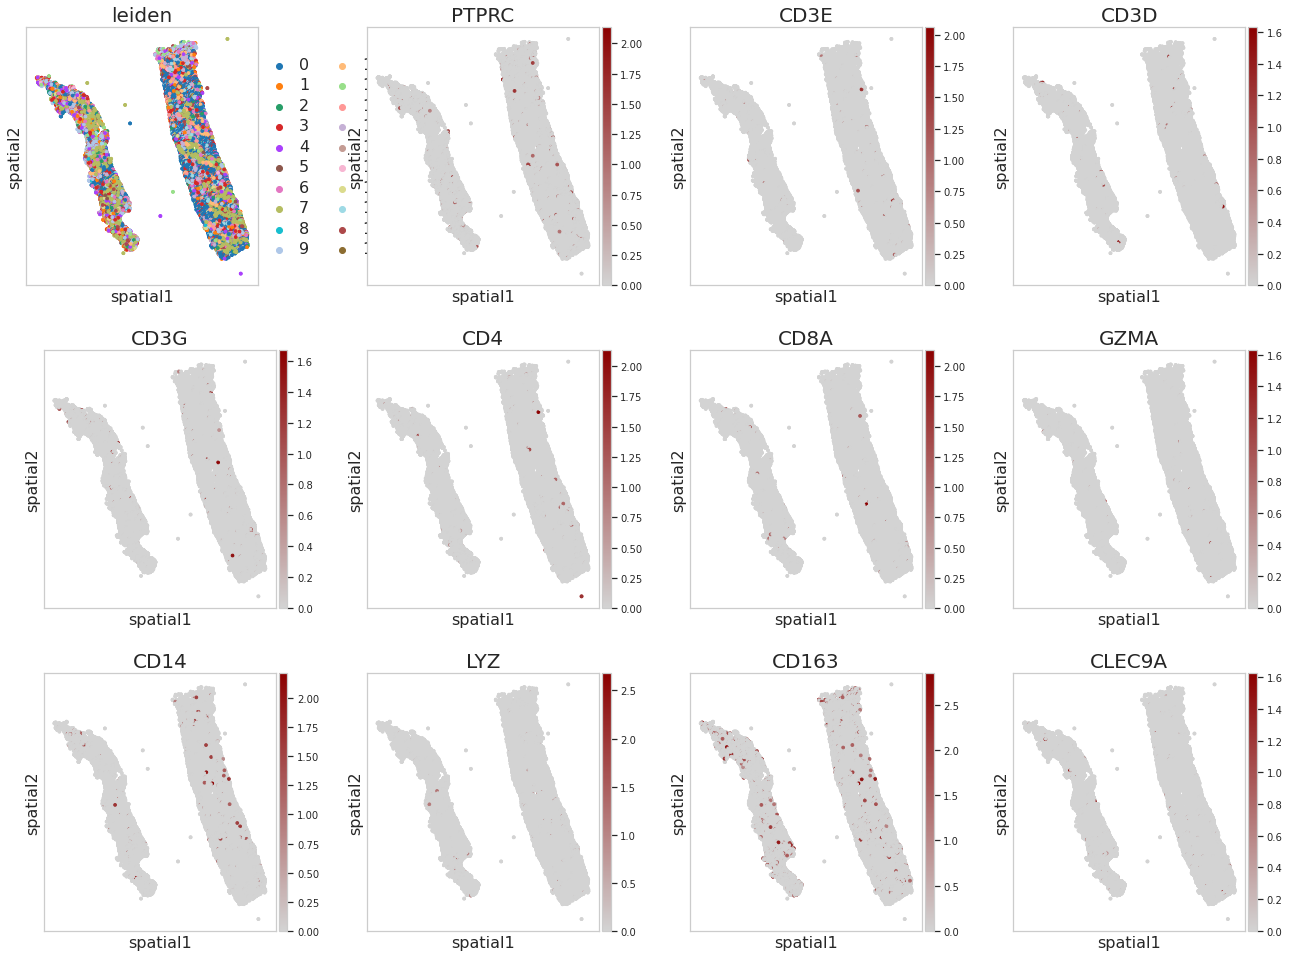

In [16]:
xmin = 0
xmax = 6000
ymin = 16000
ymax = 30000

sub_mask = ((slide1.obs["x_centroid"] >= xmin) & 
      (slide1.obs["x_centroid"] < xmax) & 
      (slide1.obs["y_centroid"] >= ymin) & 
      (slide1.obs["y_centroid"] < ymax))

# Subset the AnnData object to include only cells within the ROI
X2_Cntrl = slide1[sub_mask].copy()

# Annotate the sample id in the .obs
slide1.obs.loc[sub_mask, 'Patient_Sample_ID'] = 'X2_Cntrl' 

sq.pl.spatial_scatter(
    X2_Cntrl,
    library_id="spatial",
    cmap=cmap,  # custom color map
    shape=None,
    color= Markers_list,
    size=30,
    wspace=0.1,
    figsize=(5, 5)
)

fig = plt.gcf()  # Get current figure
axs = fig.get_axes()  # Get all axes in the figure
for ax in axs:
    ax.set_title(ax.get_title(), fontsize=20)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(16)

plt.show()

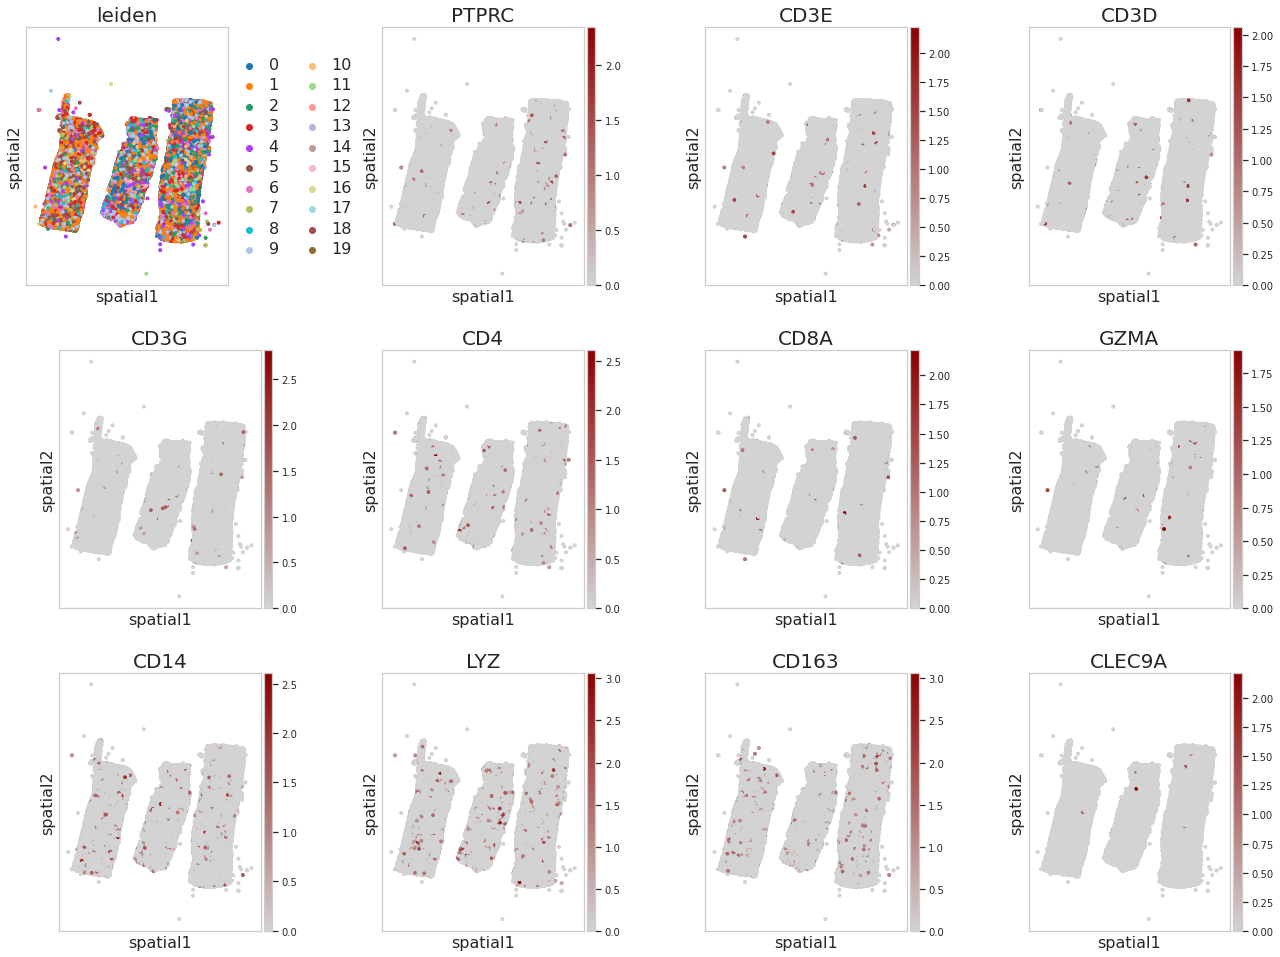

In [17]:
xmin = 6000
xmax = 12000
ymin = 10000
ymax = 16000

sub_mask = ((slide1.obs["x_centroid"] >= xmin) & 
      (slide1.obs["x_centroid"] < xmax) & 
      (slide1.obs["y_centroid"] >= ymin) & 
      (slide1.obs["y_centroid"] < ymax))

# Subset the AnnData object to include only cells within the ROI
X3_ANCA = slide1[sub_mask].copy()
slide1.obs.loc[sub_mask, 'Patient_Sample_ID'] = 'X3_ANCA' 


sq.pl.spatial_scatter(
    X3_ANCA,
    library_id="spatial",
    cmap=cmap,  # custom color map
    shape=None,
    color= Markers_list,
    size=30,
    wspace=0.1,
    figsize=(5, 5)
)

fig = plt.gcf()  # Get current figure
axs = fig.get_axes()  # Get all axes in the figure
for ax in axs:
    ax.set_title(ax.get_title(), fontsize=20)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(16)

plt.show()


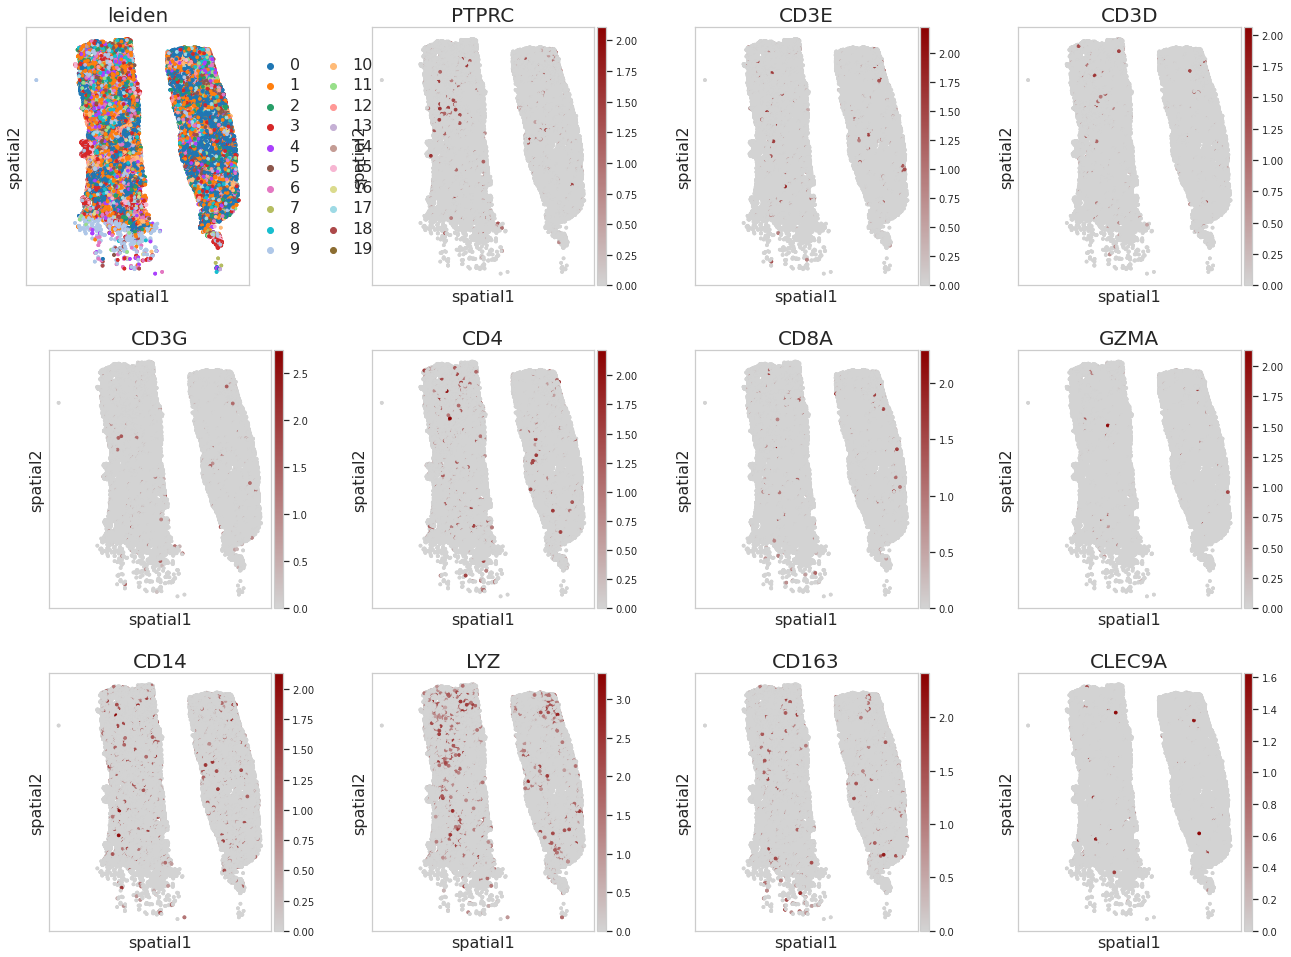

In [18]:
xmin = 0
xmax = 6000
ymin = 10000
ymax = 16000

sub_mask = ((slide1.obs["x_centroid"] >= xmin) & 
      (slide1.obs["x_centroid"] < xmax) & 
      (slide1.obs["y_centroid"] >= ymin) & 
      (slide1.obs["y_centroid"] < ymax))

# Subset the AnnData object to include only cells within the ROI
X4_ANCA = slide1[sub_mask].copy()
slide1.obs.loc[sub_mask, 'Patient_Sample_ID'] = 'X4_ANCA' 


sq.pl.spatial_scatter(
    X4_ANCA,
    library_id="spatial",
    cmap=cmap,  # custom color map
    shape=None,
    color= Markers_list,
    size=30,
    wspace=0.1,
    figsize=(5, 5)
)

fig = plt.gcf()  # Get current figure
axs = fig.get_axes()  # Get all axes in the figure
for ax in axs:
    ax.set_title(ax.get_title(), fontsize=20)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(16)

plt.show()

 


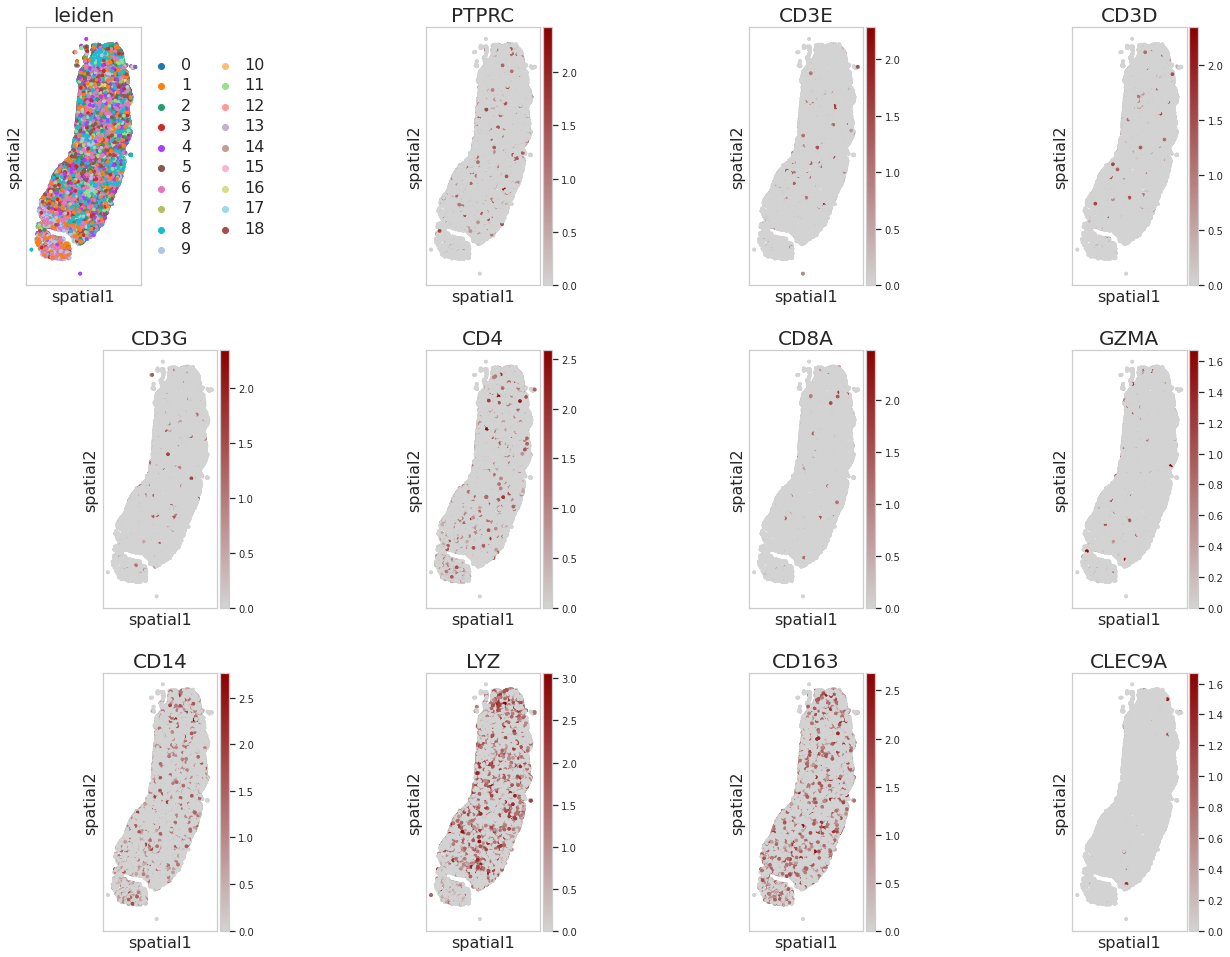

In [19]:
xmin = 9000
xmax = 12000
ymin = 5000
ymax = 10000

sub_mask = ((slide1.obs["x_centroid"] >= xmin) & 
      (slide1.obs["x_centroid"] < xmax) & 
      (slide1.obs["y_centroid"] >= ymin) & 
      (slide1.obs["y_centroid"] < ymax))

# Subset the AnnData object to include only cells within the ROI
X5_GBM = slide1[sub_mask].copy()
slide1.obs.loc[sub_mask, 'Patient_Sample_ID'] = 'X5_GBM' 


sq.pl.spatial_scatter(
    X5_GBM,
    library_id="spatial",
    cmap=cmap,  # custom color map
    shape=None,
    color= Markers_list,
    size=30,
    wspace=0.1,
    figsize=(5, 5)
)

fig = plt.gcf()  # Get current figure
axs = fig.get_axes()  # Get all axes in the figure
for ax in axs:
    ax.set_title(ax.get_title(), fontsize=20)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(16)

plt.show()

  


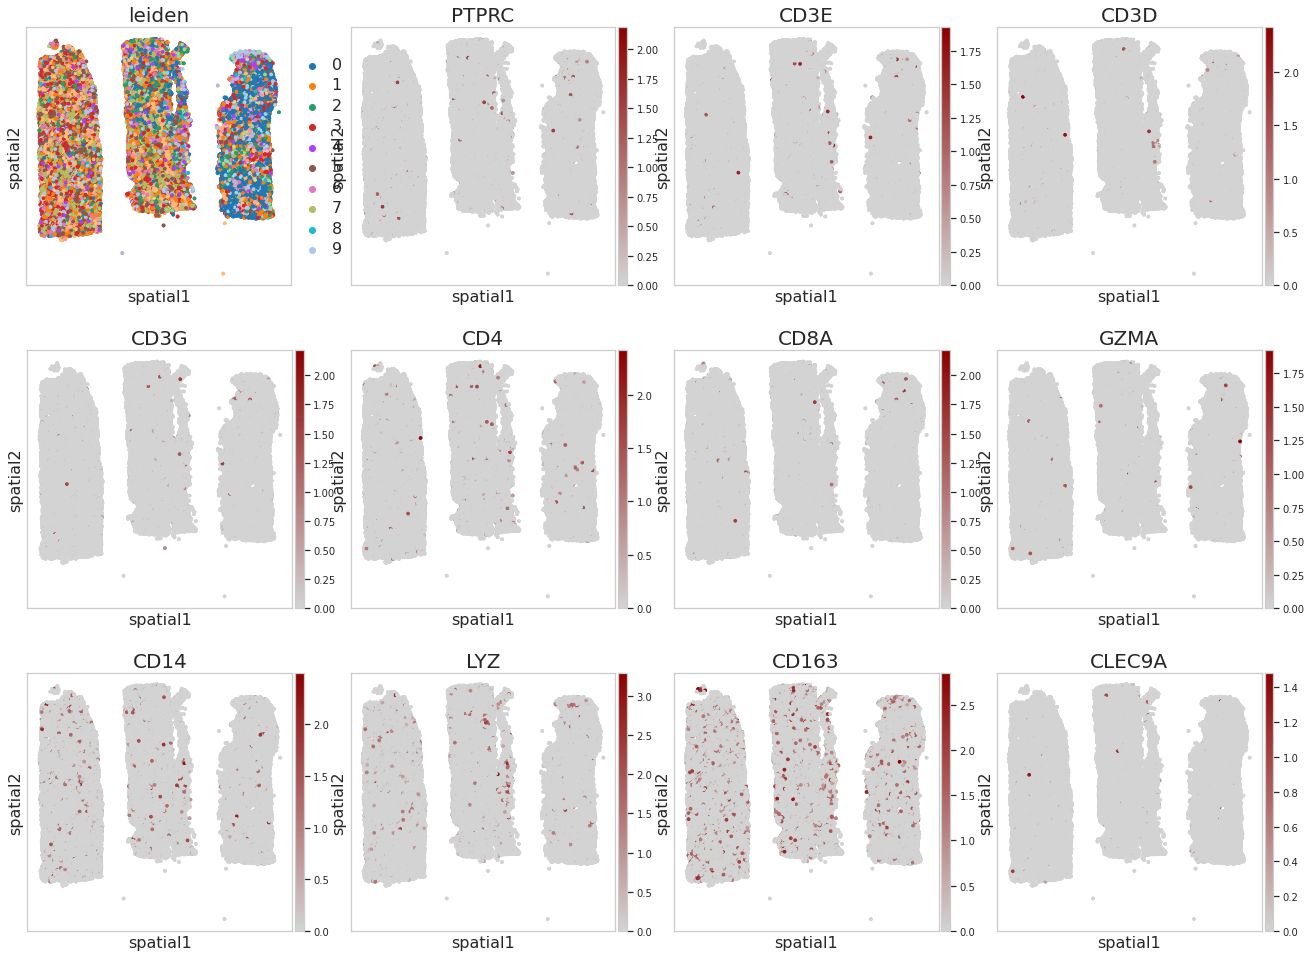

In [20]:
xmin = 0
xmax = 8800
ymin = 5000
ymax = 10000

sub_mask = ((slide1.obs["x_centroid"] >= xmin) & 
      (slide1.obs["x_centroid"] < xmax) & 
      (slide1.obs["y_centroid"] >= ymin) & 
      (slide1.obs["y_centroid"] < ymax))

# Subset the AnnData object to include only cells within the ROI
X6_ANCA = slide1[sub_mask].copy()
slide1.obs.loc[sub_mask, 'Patient_Sample_ID'] = 'X6_ANCA'  


sq.pl.spatial_scatter(
    X6_ANCA,
    library_id="spatial",
    cmap=cmap,  # custom color map
    shape=None,
    color= Markers_list,
    size=30,
    wspace=0.1,
    figsize=(5, 5)
)

fig = plt.gcf()  # Get current figure
axs = fig.get_axes()  # Get all axes in the figure
for ax in axs:
    ax.set_title(ax.get_title(), fontsize=20)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(16)

plt.show()


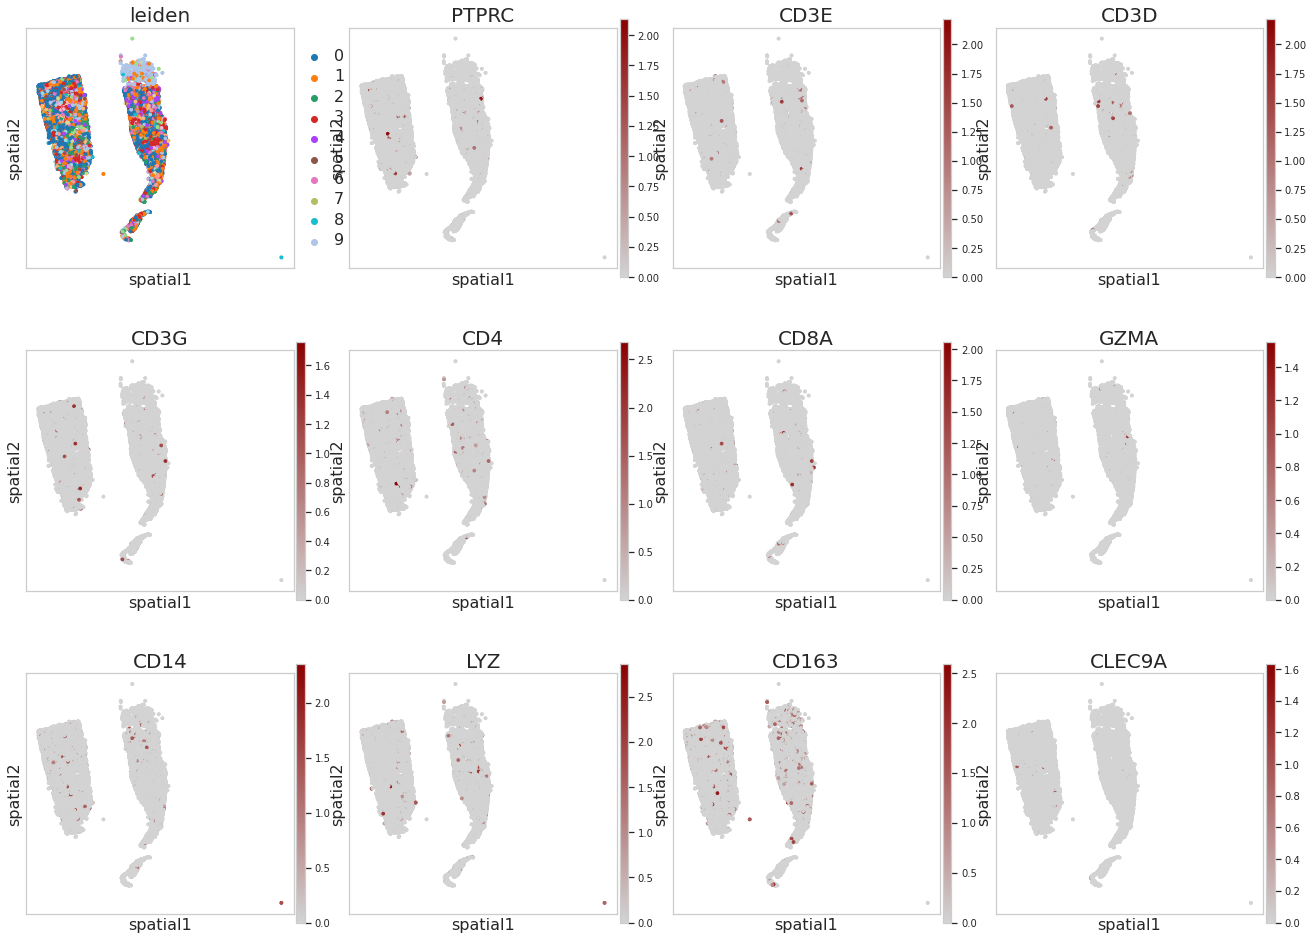

In [21]:
xmin = 6000
xmax = 10000
ymin = 0
ymax = 5000

sub_mask = ((slide1.obs["x_centroid"] >= xmin) & 
      (slide1.obs["x_centroid"] < xmax) & 
      (slide1.obs["y_centroid"] >= ymin) & 
      (slide1.obs["y_centroid"] < ymax))

# Subset the AnnData object to include only cells within the ROI
X7_SLE = slide1[sub_mask].copy()
slide1.obs.loc[sub_mask, 'Patient_Sample_ID'] = 'X7_SLE'  


sq.pl.spatial_scatter(
    X7_SLE,
    library_id="spatial",
    cmap=cmap,  # custom color map
    shape=None,
    color= Markers_list,
    size=30,
    wspace=0.1,
    figsize=(5, 5)
)

fig = plt.gcf()  # Get current figure
axs = fig.get_axes()  # Get all axes in the figure
for ax in axs:
    ax.set_title(ax.get_title(), fontsize=20)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(16)

plt.show()



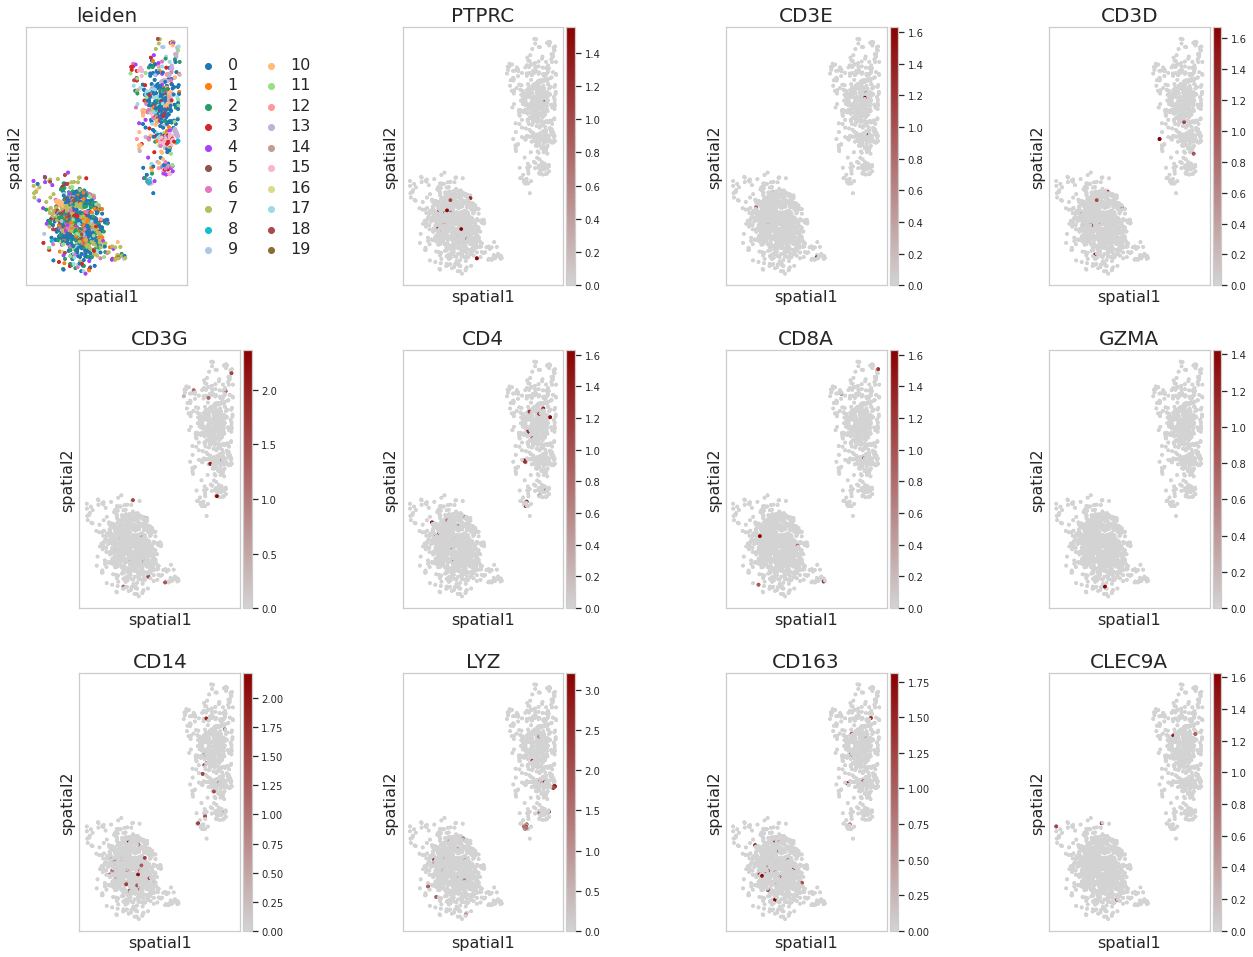

In [22]:
xmin = 0
xmax = 6000
ymin = 0
ymax = 5000

sub_mask = ((slide1.obs["x_centroid"] >= xmin) & 
      (slide1.obs["x_centroid"] < xmax) & 
      (slide1.obs["y_centroid"] >= ymin) & 
      (slide1.obs["y_centroid"] < ymax))

# Subset the AnnData object to include only cells within the ROI
X8_SLE = slide1[sub_mask].copy()
slide1.obs.loc[sub_mask, 'Patient_Sample_ID'] = 'X8_SLE' 


sq.pl.spatial_scatter(
    X8_SLE,
    library_id="spatial",
    cmap=cmap,  # custom color map
    shape=None,
    color= Markers_list,
    size=30,
    wspace=0.1,
    figsize=(5, 5)
)

fig = plt.gcf()  # Get current figure
axs = fig.get_axes()  # Get all axes in the figure
for ax in axs:
    ax.set_title(ax.get_title(), fontsize=20)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(16)

plt.show()



In [27]:
X8_SLE.write('./output_dataobjects/sample_level_objects/slide1_X8_SLE.h5ad')
X7_SLE.write('./output_dataobjects/sample_level_objects/slide1_X7_SLE.h5ad')
X6_ANCA.write('./output_dataobjects/sample_level_objects/slide1_X6_ANCA.h5ad')
X5_GBM.write('./output_dataobjects/sample_level_objects/slide1_X5_GBM.h5ad')
X4_ANCA.write('./output_dataobjects/sample_level_objects/slide1_X4_ANCA.h5ad')
X3_ANCA.write('./output_dataobjects/sample_level_objects/slide1_X3_ANCA.h5ad')
X2_Cntrl.write('./output_dataobjects/sample_level_objects/slide1_X2_Cntrl.h5ad')
X1_Cntrl.write('./output_dataobjects/sample_level_objects/slide1_X1_Cntrl.h5ad')


In [28]:
import pandas as pd

cell_counts = slide1.obs.groupby(['Patient_Sample_ID', 'leiden']).size().unstack(fill_value=0)

# Reset index to turn 'Patient_Sample_ID' back into a column
cell_counts.reset_index(inplace=True)

# Create the 'condition' column by splitting the 'Patient_Sample_ID' column
cell_counts['condition'] = cell_counts['Patient_Sample_ID'].str.split('_').str.get(-1)

# Save the DataFrame to a CSV file
cell_counts.to_csv('./figures/slide1_cell_counts_per_cluster_per_sample.csv', index=False)


# Display the first few rows of the DataFrame
print(cell_counts.head())

leiden Patient_Sample_ID      0      1     2      3     4     5     6     7  \
0               X1_Cntrl  21772   5516  3736  10110  3524  1053  2659  4500   
1               X2_Cntrl   5291   1128   992   2202   923   395   758  6261   
2                X3_ANCA   4843  10435  6548   4078  4289  6552  2824  3291   
3                X4_ANCA   5681   5364  2308   2745  1822  1289  1218   223   
4                 X5_GBM     22   3833  3735   1211  3628  2143  4502     7   

leiden     8  ...    11    12    13    14    15   16   17   18  19  condition  
0        795  ...  1471  3784  5650   294  1843  554  864  685  41      Cntrl  
1        126  ...   550  1043  1207    23   339  270  629  349   6      Cntrl  
2       2283  ...   818   875   768   421   289  677  180  150   4       ANCA  
3       1785  ...   298   715   572   397   238  198  167  113  26       ANCA  
4       8011  ...  1812   152    27  2215     6  115   20  172   0        GBM  

[5 rows x 22 columns]


In [30]:
# Calculate the proportion of cells in each cluster for each sample

cluster_proportions = (
    slide1.obs.groupby(['Patient_Sample_ID', 'leiden'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
)

# Sort the columns if necessary (the clusters might not be in order)
cluster_proportions = cluster_proportions.sort_index(axis=1)

cluster_proportions

,leiden,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Patient_Sample_ID,Patient_Sample_ID,,,,,,,,,,,,,,,,,,,,
X1_Cntrl,X1_Cntrl,26.361545,6.678775,4.523550,12.241191,4.266860,1.274973,3.219518,5.448602,0.962586,8.871534,7.763652,1.781087,4.581668,6.841022,0.355975,2.231505,0.670783,1.046131,0.829398,0.049643
X2_Cntrl,X2_Cntrl,20.219352,4.310608,3.790890,8.414858,3.527209,1.509477,2.896668,23.926169,0.481504,5.953837,8.093855,2.101804,3.985784,4.612504,0.087894,1.295475,1.031795,2.403699,1.333690,0.022929
X3_ANCA,X3_ANCA,8.964700,19.315847,12.120763,7.548637,7.939211,12.128168,5.227403,6.091850,4.225978,4.725765,3.970531,1.514170,1.619681,1.421617,0.779298,0.534957,1.253170,0.333191,0.277660,0.007404
X4_ANCA,X4_ANCA,20.463960,19.322071,8.313822,9.887972,6.563164,4.643204,4.387450,0.803285,6.429884,4.855733,4.517128,1.073448,2.575556,2.060445,1.430064,0.857318,0.713231,0.601563,0.407046,0.093657
X5_GBM,X5_GBM,0.067539,11.767053,11.466200,3.717689,11.137717,6.578867,13.820839,0.021490,24.593234,2.637073,0.319273,5.562719,0.466630,0.082888,6.799902,0.018420,0.353042,0.061399,0.528028,0.000000
X6_ANCA,X6_ANCA,13.198386,12.321152,9.848947,8.934184,3.307220,8.657410,4.529249,15.823052,1.383872,3.630905,10.113994,1.226720,3.006990,1.358071,0.032838,0.391706,1.517568,0.516020,0.168879,0.032838
X7_SLE,X7_SLE,25.152259,14.207799,8.117444,11.753477,6.053995,2.690664,4.845014,1.872557,1.236251,5.854013,4.881374,2.072539,3.181529,3.636033,0.572675,1.890737,0.636306,1.018089,0.227252,0.099991
X8_SLE,X8_SLE,26.118945,5.334151,10.668302,6.376456,4.291845,2.207235,5.150215,15.941140,1.532802,1.716738,3.740037,4.107909,1.226242,3.740037,0.183936,2.820356,0.306560,3.188228,1.226242,0.122624


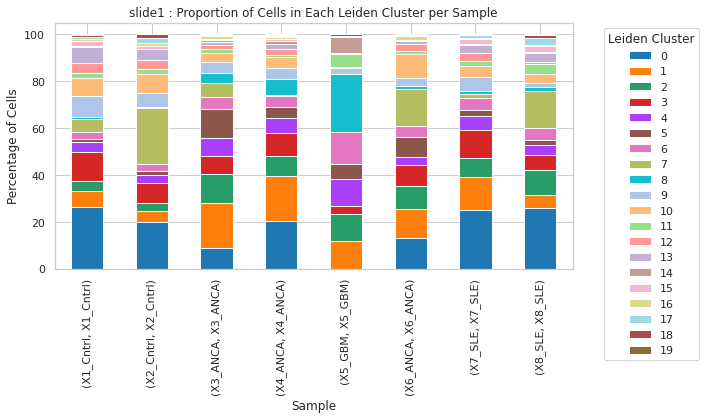

In [31]:
# Create the stacked bar plot
cluster_proportions.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),  # Adjust the figure size as necessary
    color=cluster_colors  # Use the extracted colors
    #cmap='tab20'  # Color map to use for the different stacks
)

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Percentage of Cells')
plt.title('slide1 : Proportion of Cells in Each Leiden Cluster per Sample')

# Add legend
plt.legend(title='Leiden Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.gcf().savefig("../figures/slide1_cluster_proportions.png", bbox_inches='tight')
plt.show()


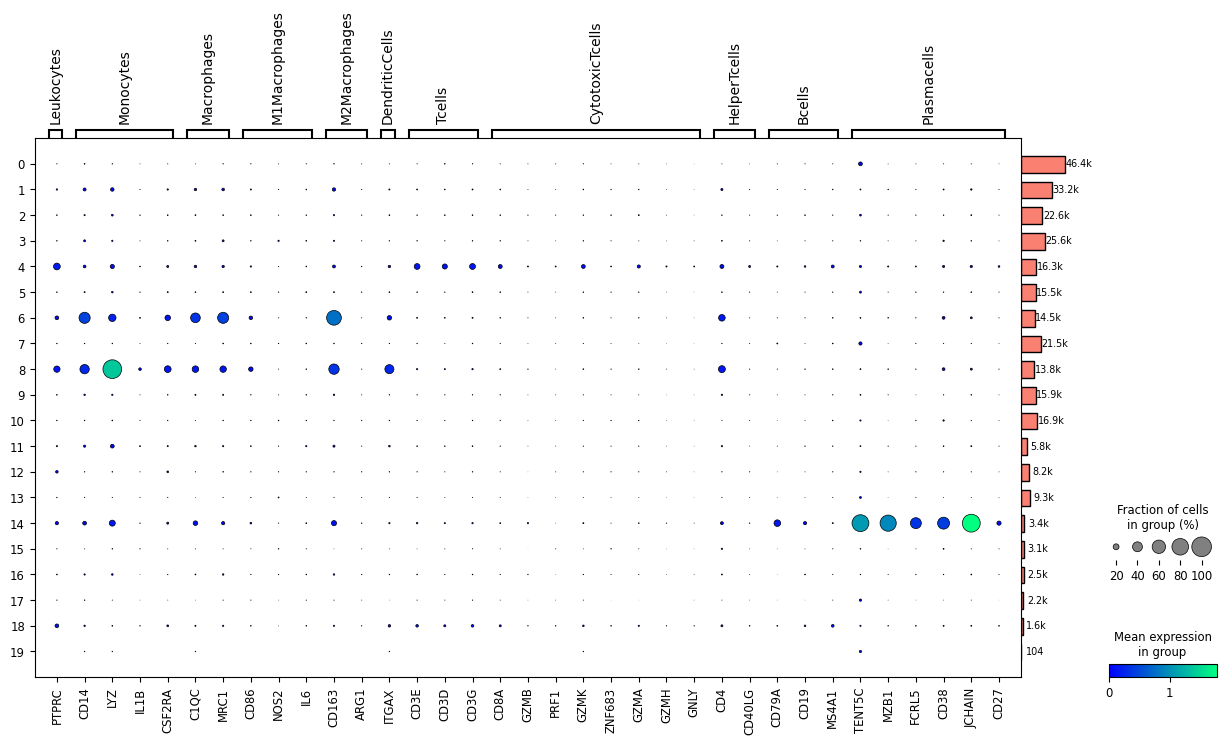

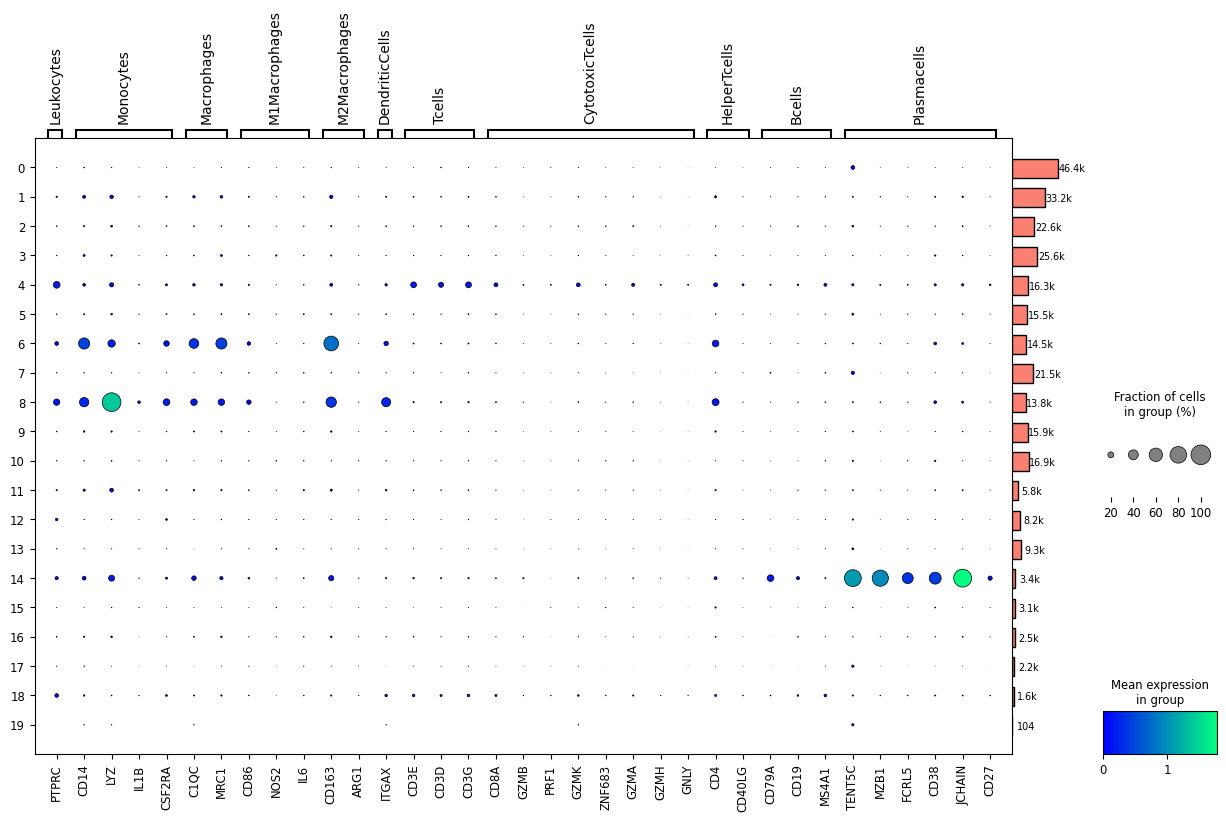

In [33]:
MajorImmuneMarkers = {
    "Leukocytes": ['PTPRC'],
    "Monocytes": ['CD14', 'LYZ', 'IL1B', 'CSF2RA'],
    "Macrophages": ['C1QC', 'MRC1'],
    "M1Macrophages": [ 'CD86', 'NOS2', 'IL6'],
    "M2Macrophages": ['CD163', 'ARG1'],
    "DendriticCells": ['ITGAX'],
    "Tcells": ['CD3E', 'CD3D', 'CD3G'],
    "CytotoxicTcells": [ 'CD8A', 'GZMB', 'PRF1', 'GZMK', 'ZNF683', 'GZMA', 'GZMH', 'GNLY'],
    "HelperTcells": [ 'CD4', 'CD40LG'],
    "Bcells": [ 'CD79A', 'CD19', 'MS4A1'],
    "Plasmacells": [ 'TENT5C', 'MZB1', 'FCRL5', 'CD38', 'JCHAIN', 'CD27'],

    }

sns.reset_defaults() # To remove the problem that dotplot of teh clusters did not get a black line demarcating the different marekr groups because of using sns.set(style="whitegrid")
dp = sc.pl.dotplot(slide1, MajorImmuneMarkers, groupby='leiden', use_raw=False, return_fig=True)
dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

dp.savefig('./figures/slide1_dotplot_MajorImmuneMarkers.png', dpi=300)